# Fetch the data

In [1]:
import pandas as pd

In [10]:
def read_coverage_table(fp):
    return pd.read_csv(fp,  sep='\t', lineterminator='\n')
    

In [12]:
cov_tables = [read_coverage_table("data/SARS-CoV-2-{}.pack.table".format(i)) for i in range(1,4)]

# Visualize the coverage in a scatter plot

In [23]:
import matplotlib.pyplot as plt

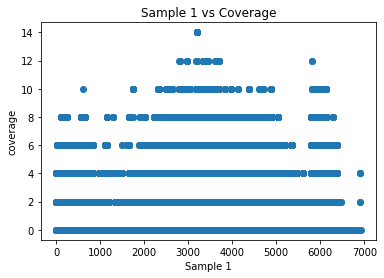

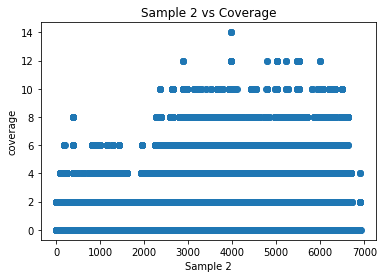

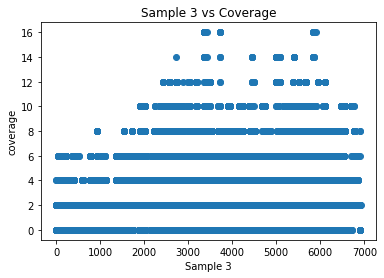

In [25]:
for i in range(3):
    sample = cov_tables[i]
    i += 1 # Because it's zero indexed but we want to visualize the 3 samples
    plt.scatter(sample['node.id'], sample['coverage']) 
    plt.title('Sample {} vs Coverage'.format(i))
    plt.xlabel('Sample {}'.format(i))
    plt.ylabel('coverage')
    plt.show()

# PCA

Extract all coverages into one dataframe

In [47]:
coverage_vectors = pd.DataFrame([cov_tables[i]["coverage"] for i in range(3)], 
                                index=["sample {}".format(i+1) for i in range(3)])
coverage_vectors

,0,1,2,3,4,5,6,7,8,9,...,106322,106323,106324,106325,106326,106327,106328,106329,106330,106331
sample 1,2,2,2,2,2,2,2,2,2,2,...,2,0,2,0,0,0,0,0,0,0
sample 2,0,0,0,0,0,0,0,0,0,0,...,0,2,0,2,2,2,2,2,2,0
sample 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Scale

In [48]:
from sklearn.preprocessing import StandardScaler
comb_scaled = StandardScaler().fit_transform(coverage_vectors)

### Perform PCA

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(comb_scaled)
display(principalComponents)

array([[-126.51143617],
       [-199.89656829],
       [ 326.40800445]])

In [68]:
sampleArray = ["sample {}".format(i+1) for i in range(3)]

In [69]:
pcaDataFrame = pd.DataFrame(principalComponents, columns = ["principal component 1"], index=sampleArray)
pcaDataFrame

,principal component 1
sample 1,-126.511436
sample 2,-199.896568
sample 3,326.408004


In [87]:
import numpy as np
colorArray = numpy.random.rand(3,)

Text(0, 0.5, 'principal component')

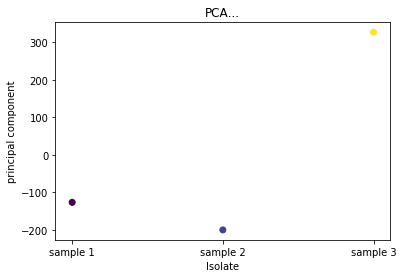

In [88]:
plt.scatter(sampleArray, pcaDataFrame['principal component 1'], c=colorArray) 

# targets = ['isolate_0', 'isolate_1']
# plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.title('PCA...')
plt.xlabel('Isolate')
plt.ylabel('principal component')

# Distance matrix

In [74]:
from scipy.spatial import distance_matrix
df = pcaDataFrame
distance_matrix = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
distance_matrix

,sample 1,sample 2,sample 3
sample 1,0.000000,73.385132,452.919441
sample 2,73.385132,0.000000,526.304573
sample 3,452.919441,526.304573,0.000000


# Neighbour joining

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist

In [78]:
#Condense the distance matrix
condensed = pdist(distance_matrix)

In [79]:
Z = linkage(condensed)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 127.10677735502709, 127.10677735502709, 0.0],
  [0.0, 784.4794828857703, 784.4794828857703, 127.10677735502709]],
 'ivl': ['sample 3', 'sample 1', 'sample 2'],
 'leaves': [2, 0, 1],
 'color_list': ['g', 'b']}

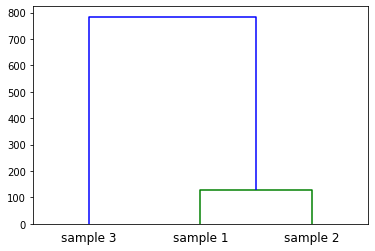

In [80]:
dendrogram(Z, labels=sampleArray)